In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plotly

%matplotlib inline

plt.style.use('default')

sns.set(style='whitegrid')
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv("../data/events.csv",low_memory=False)

# Creación de tabla para luego poder graficar y comparar

In [3]:
cantidad_gb = df[['sku','model','storage']]
cantidad_gb.drop_duplicates(inplace = True)
cantidad_gb.dropna(inplace = True)
cantidad_gb = cantidad_gb['storage'].value_counts().to_frame()
cantidad_gb.columns = ['cant_stock']


In [4]:
vendidos_gb = df.loc[df['event']=='conversion', 'storage'].to_frame()
vendidos_gb = vendidos_gb['storage'].value_counts().to_frame()
vendidos_gb.columns = ['cant_vendidos']

In [5]:
cant_eventos = df[['event','storage']]
cant_eventos.dropna(inplace=True)
cant_eventos = cant_eventos['storage'].value_counts().to_frame()
cant_eventos.columns = ['cant_eventos']

In [6]:
join_df = cantidad_gb.join(vendidos_gb)
join_df = join_df.join(cant_eventos)

In [7]:
join_df['porcentaje ventas'] = join_df['cant_vendidos'] * 100 / join_df['cant_stock'] #Agrego porcentaje
join_df

,cant_stock,cant_vendidos,cant_eventos,porcentaje ventas
16GB,1265,552,190833,43.636364
32GB,975,265,184455,27.179487
8GB,505,205,38181,40.594059
64GB,440,102,100024,23.181818
128GB,231,27,40805,11.688312
256GB,99,1,6821,1.010101
4GB,46,17,2152,36.956522
512MB,12,3,565,25.000000


# Ahora sí ploteo

Text(0,0.5,'GB')

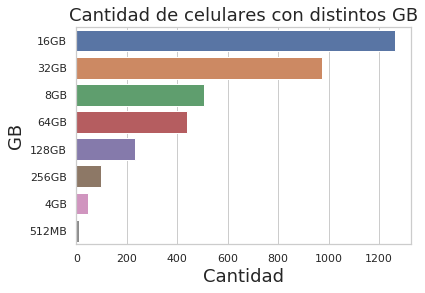

In [8]:
g = sns.barplot(x = join_df.cant_stock, y = join_df.index)
g.set_title("Cantidad de celulares con distintos GB", fontsize = 18)
g.set_xlabel("Cantidad", fontsize = 18) #CAMBIAR NOMBRE!
g.set_ylabel("GB", fontsize = 18)

Text(0,0.5,'Eventos')

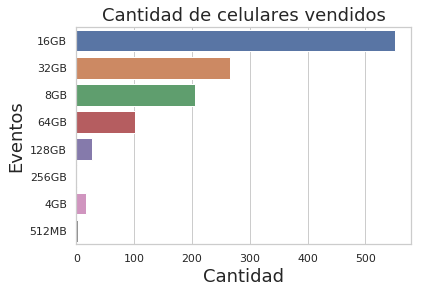

In [9]:
g = sns.barplot(x = join_df.cant_vendidos, y = join_df.index)
g.set_title("Cantidad de celulares vendidos", fontsize = 18)
g.set_xlabel("Cantidad", fontsize = 18) #CAMBIAR NOMBRE!
g.set_ylabel("Eventos", fontsize = 18)

Pero no puede notarse claramente, pese que a primera vista son los celulares con 16 GB los cuales hay, y se venden más, seguidos por los de 32GB. Creemos interesante por último visualizar el porcentaje de celulares vendidos, para podes ver de una forma más clara lo antes mencionado.

Text(0,0.5,'GB')

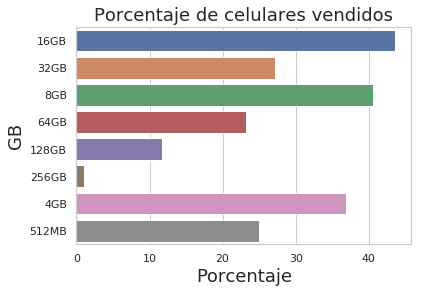

In [10]:
g = sns.barplot(x = join_df['porcentaje ventas'], y = join_df.index)
g.set_title("Porcentaje de celulares vendidos", fontsize = 18)
g.set_xlabel("Porcentaje", fontsize = 18) #CAMBIAR NOMBRE!
g.set_ylabel("GB", fontsize = 18)

Aquí sucede algo interesante, celulares con memoria de 8GB y 4GB crecieron significativamente. Queremos hacer notar que esto no se debe a la menor cantidad de celulares de esta característica, ni a las pocas ventas que posee, ya que este gráfico muestra los porcentajes, por lo que no entramos en el peligroso campo de acrementar incorrectamente los valores pequeños.
Con esto dicho, podemos observar ahora, a nivel negocio, el tipo de celulares a los que nos podemos enfocar más. Simplemente leyendo la visualización para poner un ejemplo claro, ahora sabemos que alrededor de un 43% de los celulares de 16 GB fueron vendidos, mientras que solamente el 1% de los celulares con 256GB tuvieron salida en el mercado.
Finalmente queremos hacer un análisis final sobre esto, a partir de un última inquietud. A que se deben este porcentaje de compras en los clientes? Es que celulares, como por ejemplo de 16 GB son realmente los preferidos y más buscados? O pueden mostrarnos las busquedas de los clientes interés en otros que no tiene tal vez tanta salida?

Text(0,0.5,'GB')

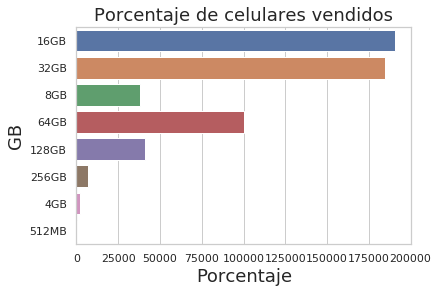

In [11]:
g = sns.barplot(x = join_df.cant_eventos, y = join_df.index)
g.set_title("Porcentaje de celulares vendidos", fontsize = 18)
g.set_xlabel("Porcentaje", fontsize = 18) #CAMBIAR NOMBRE!
g.set_ylabel("GB", fontsize = 18)

Esta nueva visualización puede respondernos nuestra pregunta, si contabilizamos la cantidad de eventos de cada tipo, vemos ahora que hay un interes importante en los celulares con 32GB, y como más notorio, casi la misma cantidad que los celulares de 16 GB (los cuales según visualizaciones anteriores tiene mayor porcentaje de venta). Las razones de este cambio no pueden ser supuestas facilmente con los datos que poseemos. Un primer análisis podría ser pensar que la diferencia de precios genera esta discrepacia, aunque por otra parte eso indicaría asumir que la memoría es lo que rige la venta de los celulares, y sabemos claramente que no es cierto.
Sin embargo si nos pareció importante agregar estos análisis, ya que los Gb que posee un celular si son un parte importante de este.